In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML2.2%20real%20classification/data/diabetes.csv")

In [4]:
y = data.Outcome
X = data.drop(["Outcome"], axis=1)

In [5]:
#Для начала импортируем нужный класс и создадим его экземпляр:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression()

In [6]:
logistic.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])] #коэффициенты
print("Intercept: \n", logistic.intercept_) #вектор свободного коэффициента

Pregnancies 0.11725234162003154
Glucose 0.033599833017272665
BloodPressure -0.014087378542667953
SkinThickness -0.0012704811238511405
Insulin -0.0012403209242111725
BMI 0.07720234864219887
DiabetesPedigreeFunction 1.419041726277172
Age 0.010035371255526136
Intercept: 
 [-7.70291291]


In [8]:
y_pred = logistic.predict(X)
from sklearn import metrics
metrics.confusion_matrix(y, y_pred)

array([[447,  53],
       [114, 154]])

Эта матрица классификации показывает нам очень полезную информацию: совместное распределение числа объектов предсказанных и реальных классов. Рассматривая эту матрицу мы можем получить важную информацию: сколько объектов мы классифицировали правильно, сколько неверно, к каким классам наша модель тяготеет, какие классы распознаются хорошо, какие - плохо.

Гораздо удобнее анализировать ту же информацию в графической форме. Для этого воспользуемся специальной библиотекой seaborn, которая позволяет создавать полезные для машинного обучения визуализации очень просто:

<Axes: >

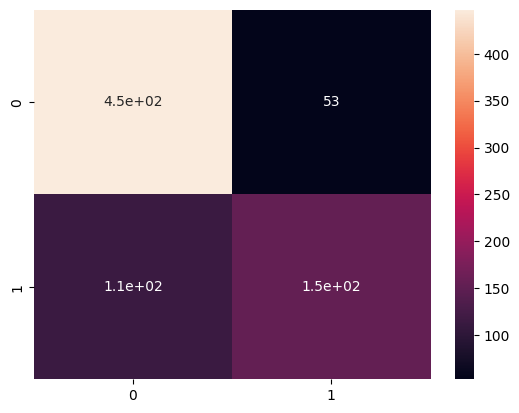

In [9]:
import seaborn as sns
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [10]:
logistic.score(X, y)

0.7825520833333334

In [ ]:
#Другой метод: metrics.accuracy_score(y_test, y_pred)

### **1. Изучите документацию sklearn, посвященную классу LogisticRegression. Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.**

**Можно вывести:**

**a) predict_proba - вероятность прогноза**

В классе LogisticRegression библиотеки sklearn метод .predict() отвечает за предсказание принадлежности к определенному классу, а метод .predict_proba() отвечает за вероятность такого прогноза. Модель предсказала для первого наблюдения класс 0. При этом, обратите внимание, что метод .predict_proba() для каждого наблюдения выдает две вероятности, первая — это вероятность принадлежности к классу 0, вторая — к классу 1.

In [17]:
#выполним предсказание класса
y_pred = logistic.predict(X)

# и найдем вероятности
probability = logistic.predict_proba(X)

In [18]:
# посмотрим на класс и вероятность первого наблюдения
y_pred[0], probability[0]

(1, array([0.28902482, 0.71097518]))

**б) decision_function - с какой стороны гиперплоскости предсказанная выборка для и на каком расстоянии от нее.**

Функция принятия решения показывает, находится ли предсказанная классификатором выборка для x_test с правой или левой стороны гиперплоскости, а также на каком расстоянии от нее. Она также сообщает нам, насколько уверенно каждое значение, предсказанное классификатором для x_test, является положительным (положительное значение большой величины) или отрицательным (отрицательное значение большой величины)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
logistic.decision_function(X_test)

**Изменим аргументы при создании модели:**

Какие аргументы есть и за что они отвечают:

1) C: Параметр регуляризации, который обратно пропорционален силе регуляризации. Меньшие значения C соответствуют более сильной регуляризации.

2) penalty: Определяет тип регуляризации.

    a) 'l1' - L1 регуляризация (Lasso),

    b) 'l2' - L2 регуляризация (Ridge). Эти типы регуляризации могут помочь предотвратить переобучение модели.

3) solver: Определяет алгоритм, используемый для оптимизации. Например:

    a) 'liblinear' - используется для малых датасетов и поддерживает и penalty='l1',

    b) 'lbfgs' - хорошо работает на больших наборах данных, поддерживает penalty='l2',
    
    c) 'saga' - поддерживает и 'l1' и 'l2', хорош для больших датасетов.

In [20]:
from sklearn.metrics import accuracy_score
model = LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность с измененными коэффициентами: {accuracy}")

Точность с измененными коэффициентами: 0.7552083333333334


Рассмотрим пример с другими параметрами. Мы можем использовать, например, параметры max_iter и class_weight:

1) max_iter: Максимальное количество итераций для сходимости оптимизационного алгоритма. Увеличение этого значения может быть полезным, если модель не сходится.

2) class_weight: Позволяет задать веса классам. Это может быть полезно в случае несбалансированных классов.

In [22]:
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность с измененными коэффициентами: {accuracy}")

Точность с измененными коэффициентами: 0.7552083333333334


В этом примере max_iter увеличен до 1000, что может быть полезно при сложных задачах оптимизации. Также добавлен параметр class_weight='balanced', который автоматически назначает веса классам, учитывая их распределение в обучающем наборе.

### **2. Попробуйте применить к той же задаче другие модели классификации. Для каждой из них выведите матрицу классификации и оценку точности. Рекомендуется исследовать следующие модели:**

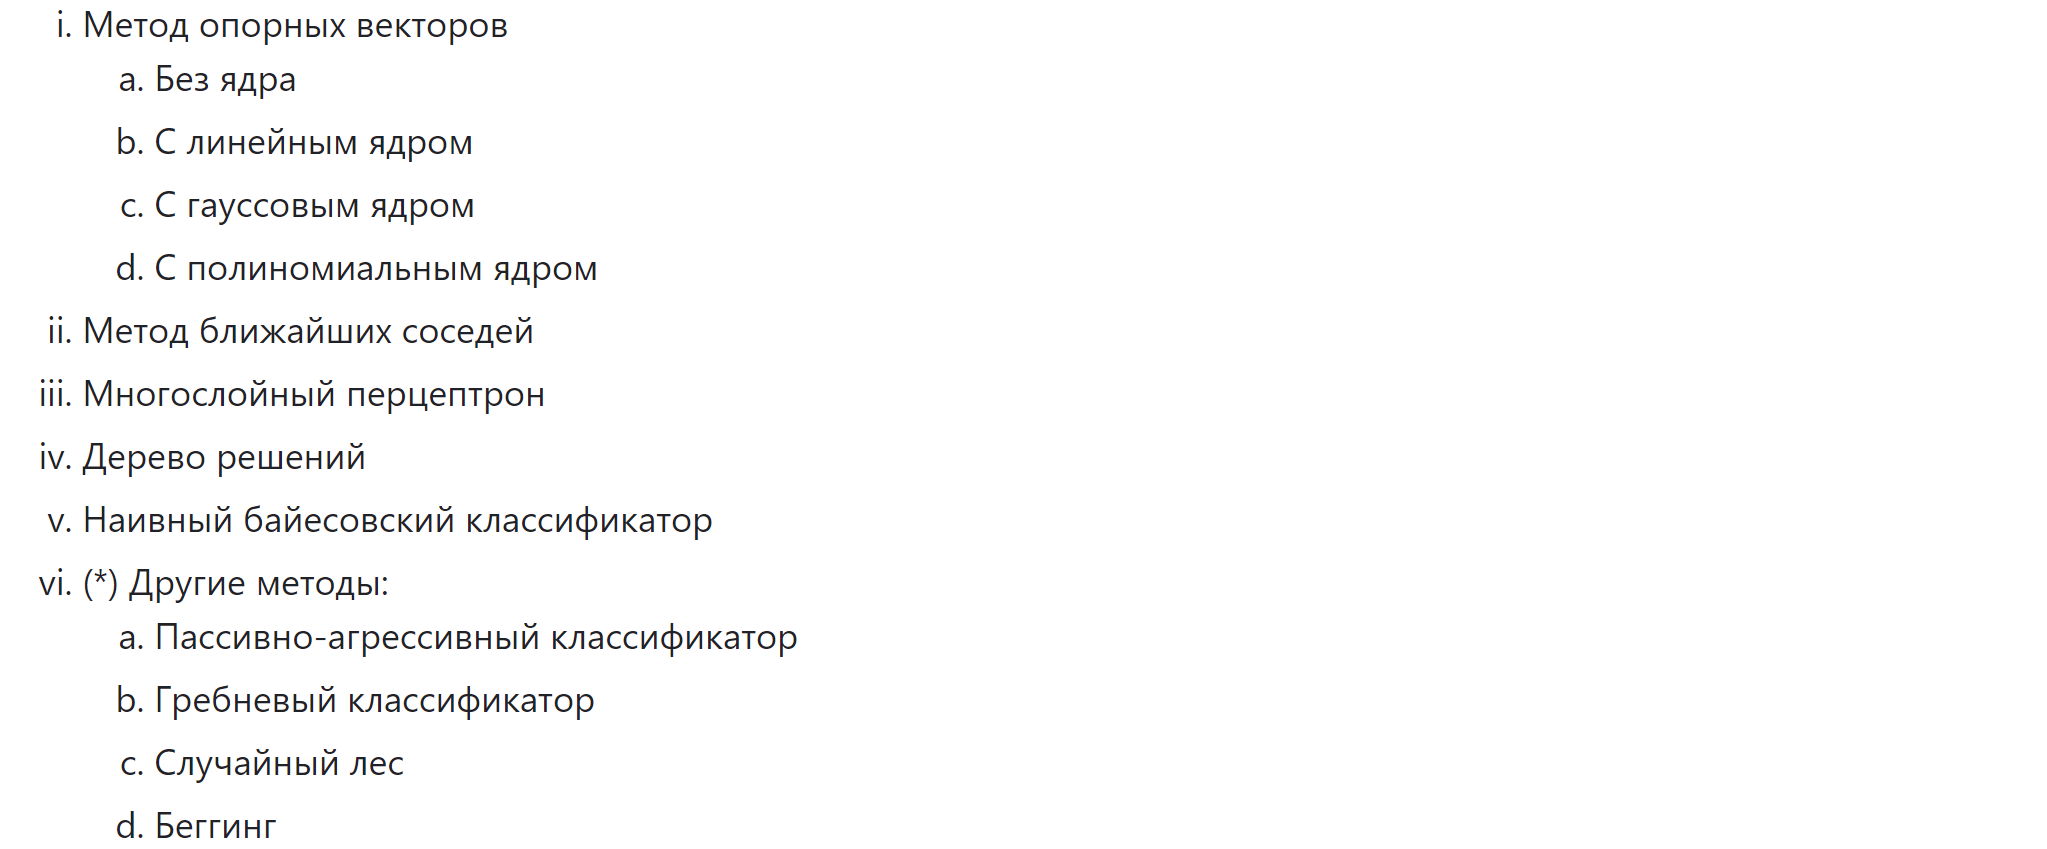

In [23]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

In [26]:
# Метод опорных векторов без ядра
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
svm_linear_pred = svm_linear.predict(X_test)
svm_linear_accuracy = accuracy_score(y_test, svm_linear_pred)
svm_linear_cm = confusion_matrix(y_test, svm_linear_pred)

# Метод опорных векторов с гауссовым ядром
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
svm_rbf_pred = svm_rbf.predict(X_test)
svm_rbf_accuracy = accuracy_score(y_test, svm_rbf_pred)
svm_rbf_cm = confusion_matrix(y_test, svm_rbf_pred)

# Метод ближайших соседей
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_cm = confusion_matrix(y_test, knn_pred)

# Многослойный перцептрон
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)
mlp_accuracy = accuracy_score(y_test, mlp_pred)
mlp_cm = confusion_matrix(y_test, mlp_pred)

# Дерево решений
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)
dt_cm = confusion_matrix(y_test, dt_pred)

# Наивный байесовский классификатор
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_cm = confusion_matrix(y_test, nb_pred)

# Случайный лес
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_cm = confusion_matrix(y_test, rf_pred)

# Вывод результатов для каждой модели
print("Метод опорных векторов без ядра:")
print("Accuracy:", svm_linear_accuracy)
print("Confusion Matrix:\n", svm_linear_cm)

print("\nМетод опорных векторов с гауссовым ядром")
print("Accuracy:", svm_rbf_accuracy)
print("Confusion Matrix:\n", svm_rbf_cm)

print("\nМетод ближайших соседей")
print("Accuracy:", knn_accuracy)
print("Confusion Matrix:\n", knn_cm)

print("\nМногослойный перцептрон")
print("Accuracy:", mlp_accuracy)
print("Confusion Matrix:\n", mlp_cm)

print("\nДерево решений")
print("Accuracy:", dt_accuracy)
print("Confusion Matrix:\n", dt_cm)

print("\nНаивный байесовский классификатор")
print("Accuracy:", nb_accuracy)
print("Confusion Matrix:\n", nb_cm)

print("\nСлучайный лес")
print("Accuracy:", rf_accuracy)
print("Confusion Matrix:\n", rf_cm)

Метод опорных векторов без ядра:
Accuracy: 0.7552083333333334
Confusion Matrix:
 [[107  15]
 [ 32  38]]

Метод опорных векторов с гауссовым ядром
Accuracy: 0.7552083333333334
Confusion Matrix:
 [[111  11]
 [ 36  34]]

Метод ближайших соседей
Accuracy: 0.71875
Confusion Matrix:
 [[101  21]
 [ 33  37]]

Многослойный перцептрон
Accuracy: 0.6614583333333334
Confusion Matrix:
 [[84 38]
 [27 43]]

Дерево решений
Accuracy: 0.7291666666666666
Confusion Matrix:
 [[94 28]
 [24 46]]

Наивный байесовский классификатор
Accuracy: 0.7604166666666666
Confusion Matrix:
 [[100  22]
 [ 24  46]]

Случайный лес
Accuracy: 0.765625
Confusion Matrix:
 [[106  16]
 [ 29  41]]


### **3. Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.**

In [28]:
#создадим словарь со всеми необходимыми моделями:
models = {
    "Метод опорных векторов без ядра" : SVC(kernel='linear'),
    "Метод опорных векторов с гауссовым ядром" : SVC(kernel='rbf'),
    "Метод ближайших соседей" : KNeighborsClassifier(),
    "Многослойный перцептрон" : MLPClassifier(),
    "Дерево решений" : DecisionTreeClassifier(),
    "Наивный байесовский классификатор" : GaussianNB(),
    "Случайный лес" : RandomForestClassifier(),
}

In [38]:
def func_models(X_train, y_train, y_test, X_test, models):
    res = {}
    for i in models.keys():
        models[i].fit(X_train, y_train)
        accuracy = accuracy_score(y_test, models[i].predict(X_test))
        res[i] = accuracy
    return res

In [41]:
func_models(X_train, y_train, y_test, X_test, models)

{'Метод опорных векторов без ядра': 0.7552083333333334,
 'Метод опорных векторов с гауссовым ядром': 0.7552083333333334,
 'Метод ближайших соседей': 0.71875,
 'Многослойный перцептрон': 0.71875,
 'Дерево решений': 0.7239583333333334,
 'Наивный байесовский классификатор': 0.7604166666666666,
 'Случайный лес': 0.7760416666666666}

### **4. Повторите полностью анализ для другой задачи - распознавание вида ириса по параметрам растения (можно использовать метод sklearn.datasets.load_iris()).**

Для начала считаем данные:

In [ ]:
from sklearn.datasets import load_iris
data1 = load_iris()

In [44]:
data = pd.DataFrame(data1.data, columns = data1.feature_names)
data['y'] = data1.target
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),y
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [46]:
y = data['y']
X = data.drop('y', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

Обучим все перечисленные раннее модели и для каждой выведем оценку точности:

In [47]:
func_models(X_train, y_train, y_test, X_test, models)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Метод опорных векторов без ядра': 1.0,
 'Метод опорных векторов с гауссовым ядром': 0.9736842105263158,
 'Метод ближайших соседей': 0.8947368421052632,
 'Многослойный перцептрон': 0.9736842105263158,
 'Дерево решений': 0.9473684210526315,
 'Наивный байесовский классификатор': 0.9736842105263158,
 'Случайный лес': 0.9473684210526315}

Для LogisticRegression():

In [49]:
logistic = LogisticRegression()
logistic.fit(X, y)

sepal length (cm) -0.41887908486415726
sepal width (cm) 0.9671062718370561
petal length (cm) -2.520933305751703
petal width (cm) -1.08419917264013
Intercept: 
 [  9.8405634    2.21733979 -12.05790319]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
_ = [print(k, v) for k, v in zip(X.columns, logistic.coef_[0])] #коэффициенты
print("Intercept: \n", logistic.intercept_) #вектор свободного коэффициента

sepal length (cm) -0.41887908486415726
sepal width (cm) 0.9671062718370561
petal length (cm) -2.520933305751703
petal width (cm) -1.08419917264013
Intercept: 
 [  9.8405634    2.21733979 -12.05790319]


[[50  0  0]
 [ 0 47  3]
 [ 0  1 49]]


<Axes: >

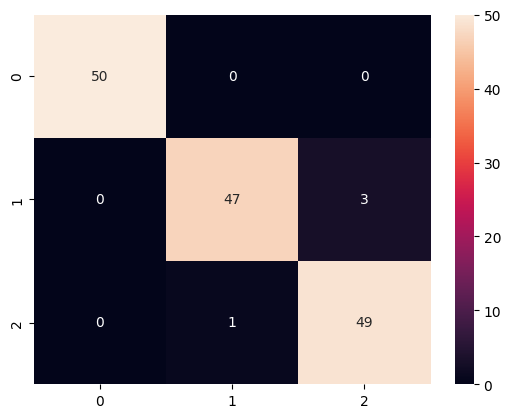

In [53]:
y_pred = logistic.predict(X)
print(metrics.confusion_matrix(y, y_pred))
sns.heatmap(metrics.confusion_matrix(y, y_pred), annot=True)

In [54]:
logistic.score(X, y)

0.9733333333333334